## 数据挖掘 hw1 q2

### 数据预处理
和$q1$一致，引入pandas和numpy，读取csv，要用到的`pluno`和`vipno`转成str方便截取，补充缺失值。同时生成^pluno^的前2,3,4,5 个位的类别

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("trade_new.csv")
dataset["pluno"]=dataset["pluno"].astype("str")
dataset["pluno_2"]=dataset["pluno"].apply(lambda x: x[:2])
dataset["pluno_3"]=dataset["pluno"].apply(lambda x: x[:3])
dataset["pluno_4"]=dataset["pluno"].apply(lambda x: x[:4])
dataset["pluno_5"]=dataset["pluno"].apply(lambda x: x[:5])
dataset=dataset.fillna(0)

dataset

,uid,sldatime,pno,cno,cmrid,vipno,id,pluno,bcd,pluname,...,amt,disamt,ismmx,mtype,mdocno,isdel,pluno_2,pluno_3,pluno_4,pluno_5
0,16072913541329219,2016-07-29 13:54:22,13,8323,男[45 以上],2900003115009,2,22002240,200328600506004228,红油桃（中）,...,5.06,0.0,0,0,0.0,0,22,220,2200,22002
1,16060809581811553,2016-06-08 09:58:40,18,8334,女[18 - 25],2900001575201,5,34150006,6926458841290,MSU男童平脚裤 74129,...,27.90,0.0,0,0,0.0,0,34,341,3415,34150
2,16022416071404989,2016-02-24 16:07:08,14,8305,女[31 - 45],1591040161114,2,11054040,6910019008819,雕牌超效加酶洗衣粉4000g,...,33.90,0.0,0,0,0.0,0,11,110,1105,11054
3,16052118091609506,2016-05-21 18:09:33,16,8308,女[18 - 25],1591016439575,2,27400855,211211400800000011,菜煎饼,...,8.00,0.0,0,0,0.0,0,27,274,2740,27400
4,16040315451414179,2016-04-03 15:45:23,14,8306,女[18 - 25],1591015027858,2,11110121,111101214,欧莱雅系列,...,39.00,0.0,0,0,0.0,0,11,111,1111,11110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22594,16072318461403789,2016-07-23 18:46:14,14,8305,女[18 - 25],2900000476042,2,10100010,5290074003198,果芬100%橙汁1L,...,15.80,0.0,0,0,0.0,0,10,101,1010,10100
22595,16071517501803300,2016-07-15 17:50:04,18,8306,女[18 - 25],1591016440328,9,15209032,5900120010024,罗兹姑娘全脂牛奶1L,...,13.80,0.0,0,0,0.0,0,15,152,1520,15209
22596,16070214021428532,2016-07-02 14:02:44,14,8323,女[18 - 25],2900000448520,4,15209031,5900159000133,乐途全脂牛奶1L,...,13.80,0.0,0,0,0.0,0,15,152,1520,15209
22597,16072518331809369,2016-07-25 18:33:15,18,8337,男[45 以上],2900000604360,13,15209031,5900159000133,乐途全脂牛奶1L,...,13.80,0.0,0,0,0.0,0,15,152,1520,15209


使用 pd.pivot_table()分别对$pluno_5,pluno_4,pluno_3,pluno_2$进行透视，透视函数选取np.sum()

In [2]:
pv_ds5 = pd.pivot_table(dataset,index=["vipno","pluno_5"],values=["amt"],aggfunc=np.sum)
pv_ds4 = pd.pivot_table(dataset,index=["vipno","pluno_4"],values=["amt"],aggfunc=np.sum)
pv_ds3 = pd.pivot_table(dataset,index=["vipno","pluno_3"],values=["amt"],aggfunc=np.sum)
pv_ds2 = pd.pivot_table(dataset,index=["vipno","pluno_2"],values=["amt"],aggfunc=np.sum)

查看一个$pv\_ds5$,确定汇总正确

In [3]:
pv_ds5

amt
vipno               pluno_5       
781924              10113     6.80
                    10130     5.50
                    11302    10.80
                    11531    15.60
                    11532    13.40
...                            ...
6227002180921663895 25101     7.74
                    27000     6.00
                    27200     5.00
                    27400     5.52
                    30380     0.50

[12761 rows x 1 columns]

为每一个$pv\_ds$生成 $vipno$ 和 $pluno$对应的数据集

In [4]:
dist_matrixs=list()
pv_dss=[pv_ds5,pv_ds4,pv_ds3,pv_ds2]
dss=list()
for pv_ds in pv_dss:
    data=dict()
    for index in pv_ds.index:
        if index[0] not in data:
            data[index[0]]=dict()
        data[index[0]][index[1]]=float(pv_ds.loc[index])

    ds=pd.DataFrame(list(data.values()), index=list(data.keys()))
    ds=ds.fillna(0)
    dss.append(ds)
    

同样检查一个

In [5]:
dss[0]

,10113,10130,11302,11531,11532,11533,14014,14050,14082,14101,...,14816,10443,10120,14902,30604,30340,30612,34032,31131,21020
781924,6.8,5.5,10.8,15.6,13.4,32.4,10.9,5.9,3.9,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
13325038116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
13854627199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
13864739266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
15954611837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900003122076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.54
2900003123479,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
6222021615010082737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
6227002180901670266,4.5,0.0,0.0,0.0,2.9,0.0,0.0,0.0,9.1,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


### k-means 聚类算法实现
采用和 q1 一样的思路，用 `np.tile()`,`np.repeat()` 堆叠矩阵第三维度,只不过在计算相似度时需要一个 for loop，否则就要在第四维度堆叠达到并行，编程复杂度太高，同时将原来的 k-means 改成可变参数，可以传入任意多数据集

In [6]:
def choose_random_k(n_sample,k):
    cols = [i for i in range(n_sample)]
    np.random.shuffle(cols)
    return cols[:k]

def jaccard_similarity(total_ds,cores,cols):
    similarities = None
    k = cores.shape[0]
    n_sample=total_ds.shape[0]
    for i in range(len(cols)):
        beg,end=sum(cols[:i]),sum(cols[:i])+cols[i]
        s = np.repeat(total_ds[:,beg:end],k,axis=0).reshape(n_sample,k,-1)# 获得数据集界限
        sp_cores = cores[:,beg:end]
        tc=np.tile(sp_cores,(s.shape[0],1,1))
        similarity=np.sum(np.minimum(s,tc),axis=2)/np.sum(np.maximum(s,tc),axis=2)
        similarities =similarity if similarities is None else similarities+similarity
    return similarities/len(cols)

In [7]:
def greil_kmeans(k,*args):
    """
    k 分簇数量
    args 数据集数组
    """
    # 统计加权计算的数量
    #拼接数据及
    total_ds = np.concatenate((args),axis=1)
    n_split_vipno = len(args)
    n_sample, n_feature = total_ds.shape
    result = np.empty(n_sample, dtype=np.int)
    cid=choose_random_k(n_sample,k)
    cores = total_ds[cid]
    
    while True: 
        similarities = np.empty((n_sample,k))
        avg_similarity=jaccard_similarity(total_ds,cores,[arg.shape[1] for arg in args])
        distances = 1-avg_similarity
        
        index_min = np.argmin(distances, axis=1) # 每个样本距离最近的质心索引序号
        if (index_min == result).all(): 
            return result, cores
        result = index_min # 重新分类
        
        for i in range(k): # 遍历质心集
            items = total_ds[result==i] # 找出对应当前质心的子样本集
            cores[i] = np.mean(items, axis=0) # 以子样本集的均值作为当前质心的位置

测试聚类输出

In [8]:
ds5,ds4,ds3,ds2 = [ds.values for ds in dss]
result,cores=greil_kmeans(2,ds5,ds4,ds3,ds2)

result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

### 聚类指标度量
除了传递可变参数，对距离矩阵每个位置用4个数据集的平均相似度代替，其余和q1没有区别，$Silhouette\ Coefficient$ 和 $Compactness$ 也和 q1 一致

In [9]:
def get_avg_jacard_matrix(*args):
    n_vipno=args[0].shape[0]
    dm = np.empty((n_vipno,n_vipno))
    for i in range(n_vipno):
        for j in range(n_vipno):
            sim = 0
            for arg in args:
                sim = sim + np.sum(np.minimum(arg[i],arg[j]))/np.sum(np.maximum(arg[i],arg[j]))
            sim = sim/len(args)
            dm[i,j]=dm[j,i]=1-sim
    return dm

def get_silhouette_coefficient(dm,result):
    n_sample = len(result)
    scs = np.empty(n_sample)
    n_k = len(np.unique(result))
    
    for i in range(n_sample):
        # 获得簇所在索引
        min_dist=float("inf")
        for c in range(n_k):
            if not c==result[i]:
                outpts=dm[i,np.where(result==c)]
                outdist=np.sum(outpts,axis=1)/outpts.shape[1]
                if outdist<min_dist:
                    min_dist=outdist

        inpts=dm[i,np.where(result==result[i])]
        if inpts.shape[1] == 1:
            scs[i]= 0
        else:
            in_dist=np.sum(inpts,axis=1)/(inpts.shape[1]-1)
            scs[i]= (min_dist-in_dist)/max(min_dist,in_dist)
    return np.mean(scs)

def get_compactness(result,cores,*args):
    n_sample = args[0].shape[0]
    n_cluster=cores.shape[0]
    cts = np.empty((n_cluster,1))
    total_compactness = 0
    
    for i in range(n_cluster):
        sims = None
        for arg in args:
            #对一个表的jaccard相似性矩阵->相似距离
            pts = arg[np.where(result==i)]
            #质心位置
            cpt=np.mean(pts,axis=0)
            #一个点对其所在簇的质心的jaccard相似度
            sim=np.sum(np.minimum(pts,cpt),axis=1)/np.sum(np.maximum(pts,cpt),axis=1)
            sims = sim if sims is None else sims+sim
        sims = sims/len(args)
        #jaccard相似度->距离
        dists = 1-sims 
        cluster_dist=np.sum(dists)/dists.shape[0]
        total_compactness = total_compactness + cluster_dist
        
    return total_compactness / n_cluster

用上述函数计算距离矩阵并检查

In [10]:
dm=get_avg_jacard_matrix(ds5,ds4,ds3,ds2)

dm

array([[0.        , 0.9649963 , 0.95990932, ..., 0.77683091, 0.87604246,
        0.93773253],
       [0.9649963 , 0.        , 0.97310518, ..., 0.95749118, 0.91990264,
        0.97601086],
       [0.95990932, 0.97310518, 0.        , ..., 0.81143678, 0.90093265,
        0.93398598],
       ...,
       [0.77683091, 0.95749118, 0.81143678, ..., 0.        , 0.838977  ,
        0.95060103],
       [0.87604246, 0.91990264, 0.90093265, ..., 0.838977  , 0.        ,
        0.93388144],
       [0.93773253, 0.97601086, 0.93398598, ..., 0.95060103, 0.93388144,
        0.        ]])

一共有486个用户，测试 $Compactness$ 随 $k$ 变化趋势

In [12]:
cps=dict()
for k in range(2,101):
    box=list()
    for attempt in range(2):
        result,cores=greil_kmeans(k,ds5,ds4,ds3,ds2)
        cp =get_compactness(result,cores,ds5,ds4,ds3,ds2)
        box.append(cp)
    print("{}-means cp：".format(k),np.mean(box))
    cps[k] = np.mean(box)

2-means cp： 0.8490474049227905
3-means cp： 0.8381719727492105
4-means cp： 0.8471018029787956
5-means cp： 0.8236382469033978
6-means cp： 0.8136564905687702
7-means cp： 0.8145857523635007
8-means cp： 0.8085560060950789
9-means cp： 0.8007385861380627
10-means cp： 0.7939612737132383
11-means cp： 0.7920569040041223
12-means cp： 0.7864659870981714
13-means cp： 0.7876181992943372
14-means cp： 0.7836823213840598
15-means cp： 0.7731161288951309
16-means cp： 0.7720509951003951
17-means cp： 0.764148992338856
18-means cp： 0.7638570780888116
19-means cp： 0.7624245609518496
20-means cp： 0.7515771637988817
21-means cp： 0.7565761901771177
22-means cp： 0.7453420239252163
23-means cp： 0.7517964662095464
24-means cp： 0.7526822631044163
25-means cp： 0.7331193752826655
26-means cp： 0.7445491127556988
27-means cp： 0.7470623341602747
28-means cp： 0.7435106296475722
29-means cp： 0.7380844038830637
30-means cp： 0.7341508570801578
31-means cp： 0.735891298694572
32-means cp： 0.7196040460195812
33-means cp： 0.727

同样486个用户，测试 $Silhouette\ Coefficient$ 变化趋势,输出结果上方 $sklearn$ 自带，下方是自己实现。

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
scs=dict()
for k in range(2,101):
    mybox=list()
    skbox=list()
    result,cores=greil_kmeans(k,ds5,ds4,ds3,ds2)
    score = get_silhouette_coefficient(dm,result)
    score2= silhouette_score(dm, result, metric="precomputed")
    mybox.append(score)
    skbox.append(score2)
    print("sk {}-means sc:".format(k),score2)
    #print("my {}-means sc:".format(k),score)
    scs[k] = score
    #print('-'*30)

sk 2-means sc: 0.06083905514005158
sk 3-means sc: 0.04492261443117791
sk 4-means sc: 0.04332503665680146
sk 5-means sc: 0.02876103655205415
sk 6-means sc: 0.03071566500797389
sk 7-means sc: 0.02887836531817975
sk 8-means sc: 0.027449755523694334
sk 9-means sc: 0.0253156191077293
sk 10-means sc: 0.02894113082432758
sk 11-means sc: 0.029515332624085972
sk 12-means sc: 0.028158687985240995
sk 13-means sc: 0.02657117114353114
sk 14-means sc: 0.03242981831500094
sk 15-means sc: 0.024911142996174404
sk 16-means sc: 0.024031888922985484
sk 17-means sc: 0.026575494198145772
sk 18-means sc: 0.027911226319158326
sk 19-means sc: 0.025929643798052664
sk 20-means sc: 0.023453106563365442
sk 21-means sc: 0.02487163689676318
sk 22-means sc: 0.02142366719306873
sk 23-means sc: 0.023225663660681344
sk 24-means sc: 0.02394957099804171
sk 25-means sc: 0.02157336526714407
sk 26-means sc: 0.022333601529940315
sk 27-means sc: 0.02287615027269123
sk 28-means sc: 0.025988708762005694
sk 29-means sc: 0.0244281

### 聚类结果分析
分别作出 $SC$ 和 $CP$ 随着 $k$ 的变化趋势散点图，并用三次函数拟合

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def draw_trend(x,y,n,lbx,lby,title):
    fig =plt.figure(2)
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y,s=5,c='b',marker=(10,1),alpha=1 ,lw=1,facecolors='none')
    ax.set_title(title)
    plt.xlabel(lbx)#x轴上的名字
    plt.ylabel(lby)#y轴上的名字 
    
    parameter = np.polyfit(x, y, n) # n=1为一次函数，返回函数参数
    f = np.poly1d(parameter) # 拼接方程
    plt.plot(x, f(x),"black")
    
    plt.show()
    
def draw_dist_freq(dm):
    hist,bins = np.histogram(list(dm.flatten()),bins = 200)
    hist = hist/(dm.shape[0] * dm.shape[1])

    plt.bar(list(bins)[1:],list(hist),width=0.01)
    plt.title("Scale of Distance") 
    plt.xlabel("distance")#x轴上的名字
    plt.ylabel("frequency")#y轴上的名字 
    plt.show()



距离分布：

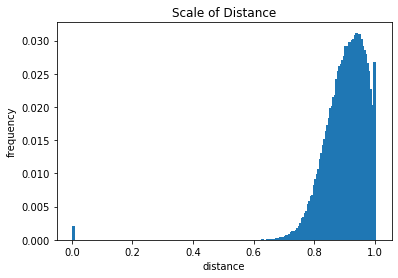

In [15]:
draw_dist_freq(dm)

可以看出，相比于q1，q2的距离变得分散了一些。

$SC$ 随 $k$ 变化趋势：

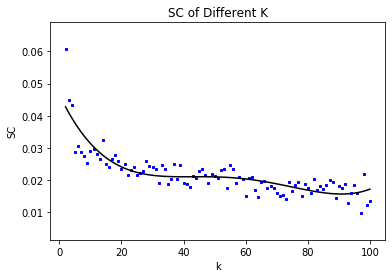

In [16]:
draw_trend(list(scs.keys()),list(scs.values()),4,"k","SC","SC of Different K")

$SC$比q1有提升，但是依然不高，且下降得比较快。

$CP$ 随 $k$ 变化趋势：

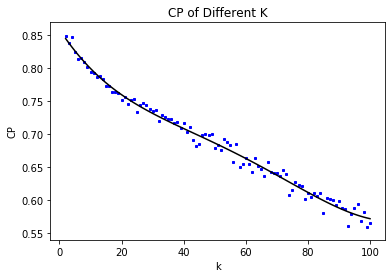

In [17]:
draw_trend(list(cps.keys()),list(cps.values()),4,"k","CP","CP of Different K")

$CP$ 符合预期，呈总体下降且无异常点。

如果计算准确，$CP$ 变化趋势就应该如图所示呈总体下降趋势（当k取点的数目是就应该$CP$必定是0）。而 $SC$ 随着 $K$ 的变大迅速变小，当k=2时达到最大，在2-5范围的点$SC$都较高，考虑到数据集只有486个点，我认为取$[2,5]$时比较合理，其中$K=2$是$SC$最优点。